# Heart Disease Prediction Using Logistic Regression

**Logistic Regression** is a statistical and machine-learning technique classifying records of a dataset based on the values of the input fields. It predicts a dependent variable based on one or more sets of independent variables to predict outcomes. It can be used both for binary classification and multi-class classification. To know more about it, [click here](https://www.geeksforgeeks.org/understanding-logistic-regression/). 

In [37]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pylab as pl

%matplotlib inline

In [38]:
disease_df = pd.read_csv('framingham.csv')
disease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [39]:
disease_df.shape

(4240, 16)

In [40]:
# Drop education, and convert male column name to Sex_male
disease_df.drop('education', axis=1, inplace=True)
disease_df.rename(columns = {'male': "Sex_male"}, inplace=True)

disease_df.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [41]:
# Remove NaN/Null values
disease_df.dropna(axis=0, inplace=True)
disease_df.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [42]:
disease_df.shape

(3751, 15)

In [43]:
disease_df.TenYearCHD.value_counts()

TenYearCHD
0    3179
1     572
Name: count, dtype: int64

In [44]:
X = disease_df.drop(['TenYearCHD'], axis=1)
y = disease_df['TenYearCHD']

# Normalize the data
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (2625, 14) (2625,)
Test set: (1126, 14) (1126,)


Accuracy of the model is: 0.8525754884547069


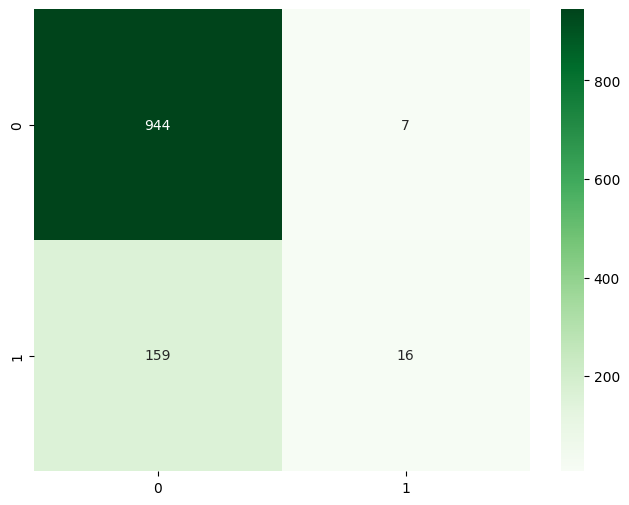

Details for confusion matrix is:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       951
           1       0.70      0.09      0.16       175

    accuracy                           0.85      1126
   macro avg       0.78      0.54      0.54      1126
weighted avg       0.83      0.85      0.80      1126



In [45]:
# Fit the model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X_train, y_train)
y_pred = LR.predict(X_test)

# Evaluate the Accuracy
from sklearn.metrics import accuracy_score
print(f"Accuracy of the model is: {accuracy_score(y_test, y_pred)}")

# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap="Greens")

plt.show()

print("Details for confusion matrix is:")
print(classification_report(y_test, y_pred))
